In [2]:
#we are classifying emails in this implementation
#adding raw email data to our project as a dataframe 
import pandas as pd
raw_data = pd.read_csv('C:\\Users\\parve\\Downloads\\archive\\SpamDetectionData.csv')
raw_data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [9]:
#cleaning the data to ensure smooth manipulation
#checking null values
print ('Count of null values: ')
raw_data.isna().sum()

Count of null values: 


label    0
text     0
dtype: int64

In [10]:
#checking duplicates
import numpy as np
print('Count of duplicate values: ')
np.sum(raw_data.duplicated())

Count of duplicate values: 


0

In [17]:
#size of data
print('(records, features) = ') 
raw_data.shape 


(records, features) = 


(83448, 2)

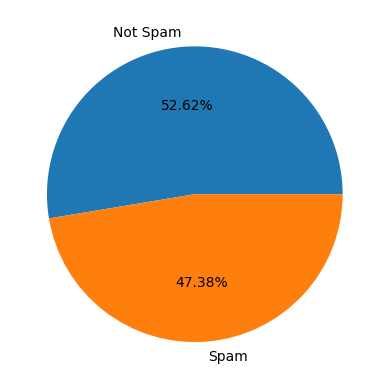

In [20]:
#visualising the data
import matplotlib.pyplot as plt
labels = {0 : "Not Spam", 1 : "Spam"}
label_counts = raw_data['label'].value_counts()
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

In [23]:
#creating a bag of word model using naive bayes theorem
X = raw_data.drop('label', axis = 1).values
y = raw_data['label'].values
print(X.shape, y.shape)
from sklearn import feature_extraction
vectorizer = feature_extraction.text.CountVectorizer()
X = vectorizer.fit_transform(X.reshape(-1))   
print("Vocabulary Count:", len(vectorizer.get_feature_names_out()))

(83448, 1) (83448,)
Vocabulary Count: 310813


In [27]:
#making training and testing set
from sklearn import linear_model, naive_bayes, ensemble, tree, svm, model_selection,preprocessing, metrics, base, pipeline
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.15, stratify = y)
print(X_train.shape, X_test.shape)

(70930, 310813) (12518, 310813)


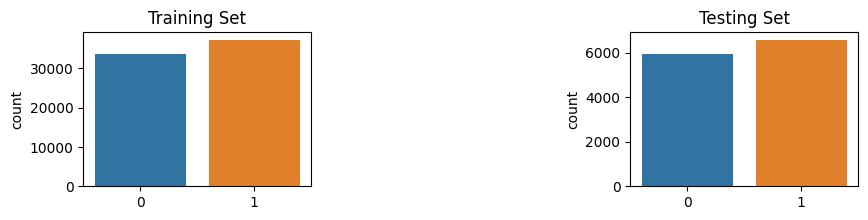

In [28]:
# Checking whether the labels are distributed uniformely

plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.countplot(x = y_train)

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.countplot(x = y_test)
plt.show()


In [3]:
import re from collections import defaultdict
import math

#creating a function of bag of word model using naive bayes theorem
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = defaultdict(float)
        self.word_probs = defaultdict(lambda: defaultdict(float))

    def train(self, data):
        total_docs = len(data)
        class_counts, word_counts = self.count_words(data)

        self.calculate_class_probs(total_docs, class_counts)
        self.calculate_word_probs(word_counts, class_counts)

    def count_words(self, data):
        class_counts = defaultdict(int)
        word_counts = defaultdict(lambda: defaultdict(int))

        for label, text in data.iterrows():
            class_counts[text['label']] += 1
            words = re.findall(r'\b\w+\b', text['text'].lower())
            for word in words:
                word_counts[text['label']][word] += 1

        return class_counts, word_counts

    def calculate_class_probs(self, total_docs, class_counts):
        for label, count in class_counts.items():
            self.class_probs[label] = count / total_docs

    def calculate_word_probs(self, word_counts, class_counts):
        for label, words in word_counts.items():
            total_words = sum(words.values())
            for word, count in words.items():
                self.word_probs[label][word] = count / total_words

    def predict(self, document):
        words = re.findall(r'\b\w+\b', document.lower())
        scores = defaultdict(float)

        for label, class_prob in self.class_probs.items():
            score = self.calculate_score(class_prob, words)
            scores[label] = score

        return max(scores, key=scores.get)

    def calculate_score(self, class_prob, words):
        score = 0

        for word in words:
            # Use Laplace smoothing to avoid zero probabilities
            score += -math.log(self.word_probs[label].get(word, 0.0001))

        return math.log(class_prob) + score

# Assuming 'raw_data' is your DataFrame
# Select the relevant columns, assuming 'label' is the column with labels and 'text' is the column with email text
data = raw_data[['label', 'text']]

# Split data into training and testing sets
split_point = int(0.8 * len(data))
train_data, test_data = data[:split_point], data[split_point:]

# Create and train the classifier
classifier = NaiveBayesClassifier()
classifier.train(train_data)

# Test the classifier on the test set
correct_predictions = 0
for index, row in test_data.iterrows():
    label, text = row['label'], row['text']
    prediction = classifier.predict(text)
    if prediction == label:
        correct_predictions += 1

accuracy = correct_predictions / len(test_data)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 52.51%


In [5]:
#test case to check the naive bayes text classifier
data = raw_data[['label', 'text']]

# Split data into training and testing sets
split_point = int(0.8 * len(data))
train_data, test_data = data[:split_point], data[split_point:]

# Create and train the classifier
classifier = NaiveBayesClassifier()
classifier.train(train_data)

# Test the classifier on the test set
correct_predictions = 0
for index, row in test_data.iterrows():
    label, text = row['label'], row['text']
    prediction = classifier.predict(text)

    # Print actual vs predicted labels
    print(f"Actual: {label}, Predicted: {prediction}")

    if prediction == label:
        correct_predictions += 1


Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predi

Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predi

Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predi

Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predi

Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predi

Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predi

Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predi

Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predi

In [6]:
accuracy = correct_predictions / len(test_data)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Accuracy: 52.51%
